<a href="https://colab.research.google.com/github/DDatachick/Loan-Prediction-app/blob/master/Loan_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install preprocessing

     |████████████████████████████████| 358kB 5.1MB/s 
     |████████████████████████████████| 1.2MB 55.7MB/s 
     |████████████████████████████████| 1.4MB 18.6MB/s 
  Created wheel for nltk: filename=nltk-3.2.4-cp36-none-any.whl size=1367706 sha256=d12394e262710973ff8278c88fb36a4e1883493a5736c56019d4ad268b4caecc
  Stored in directory: /root/.cache/pip/wheels/36/f1/5c/f667347d86a3a534ba4c0127eed4389f929916e3ec88bb461a
Successfully built nltk
  Found existing installation: nltk 3.2.5
    Uninstalling nltk-3.2.5:
      Successfully uninstalled nltk-3.2.5


In [0]:
#importation of Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# The preprocessing package provides transformations applied to your data before feeding it to the algorithm.
from sklearn import *


In [0]:
#importation of the training data into enviroment
train = pd.read_csv('train.csv')

In [3]:
# View the first 10 rows of dataset
train.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [4]:
#The statistical discription of the available data
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [5]:
#Understanding all data types and count of data
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
#unique values and frequencies for non numerical values 
train['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

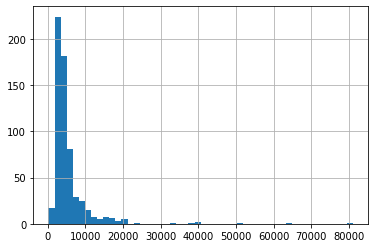

In [7]:
#Histogram of applicant incomes against population
train['ApplicantIncome'].hist(bins=50)

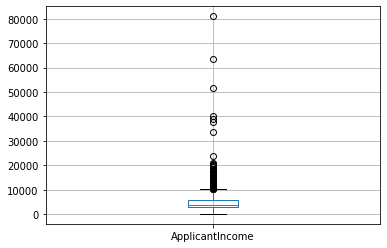

In [8]:
#Using whister boxplot to identifiy outliners
train.boxplot(column ='ApplicantIncome')

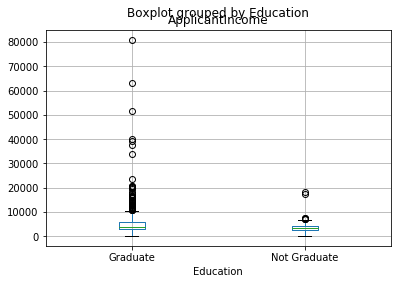

In [9]:
# To get a better understanding of the applicant income distribution. 
train.boxplot(column ='ApplicantIncome', by = 'Education' )

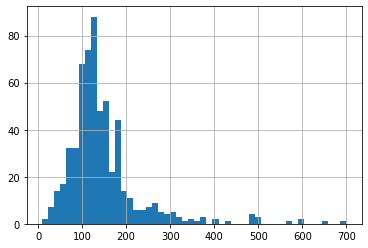

In [10]:
#Histogram forof the variable loan amount.
train['LoanAmount'].hist(bins=50)

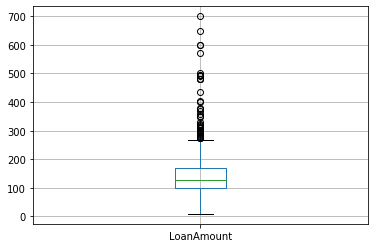

In [11]:
# boxplot of the variable loanamount to identify Outliner 
train.boxplot(column = 'LoanAmount')

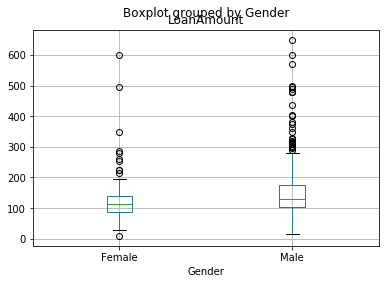

In [12]:
# boxplot of loan amount by gender
train.boxplot(column = 'LoanAmount', by = 'Gender')

 Distribution of Categorical Varaiables

In [13]:
#Identify number of loans approved
loan_approval = train ['Loan_Status'].value_counts()['Y']
print(loan_approval)

422


In [14]:
# Trying to find relationships
pd.crosstab(train ['Credit_History'], train ['Loan_Status'],margins=True)

Loan_Status,N,Y,All
Credit_History,,,
0.0,82,7,89
1.0,97,378,475
All,179,385,564


In [39]:
# Reason: It was giving an error message that Credit_History was a key error
train.reset_index()

Loan_Status,Credit_History,N,Y,All
0,0,0.921348,0.078652,1.0
1,1,0.204211,0.795789,1.0
2,All,0.317376,0.682624,1.0


In [41]:
train.columns

Index(['N', 'Y', 'All'], dtype='object', name='Loan_Status')

In [42]:
def percentageConvert (ser):
  return ser/float(ser[-1])

  #loan aproval rate of customers with credit histroy 1
  
train = pd.crosstab(train ['Credit_History'], train ['Loan_Status'],margins=True).apply(percentageConvert, axis=1)
loan_approval_with_Credit = train['Y'][+1]
print(loan_approval_with_Credit_1*100)

KeyError: ignored

In [43]:
train['Y']

Credit_History
0.0    0.078652
1.0    0.795789
All    0.682624
Name: Y, dtype: float64

In [24]:
#fill in missing values of self_employed
train['Self_Employed'].fillna('No',inplace=True)

KeyError: ignored

Outliners of Loan Amount and Applicant Income

In [32]:
train['TotalIncome'] = train['ApplicantIncome'] + train ['CoapplicantIncome']
train['LoanAmount'].hist(bins = 50)

KeyError: ignored

In [26]:
credit = train['Credit_History'].value_counts (ascending = True)
credit2 = train.pivot_table(values= 'Loan_Status',index = ['Credit_History'], aggfunc=lambda x:x.map({'Y': 1, 'N' : 0}).mean())
print ('Frequency Table for Credit History:')
print (credit)
print ('\n Probility of getting loan for each credit Histroy class:')
print (credit2)

KeyError: ignored

In [27]:
#To identify missing data
train.apply(lambda x :sum(x.isnull()),axis = 0)

Loan_Status
N      0
Y      0
All    0
dtype: int64

To fill missing values

In [0]:
train['LoanAmount'].fillna(train['LoanAmount'].mean(), inplace = True)

To deciede what to replace missing values with.


In [0]:
train['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [0]:
train('Self_Employed'.fillna('No',inplace = True))

AttributeError: ignored